In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.linear_model import (LinearRegression,
                                 Lasso)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_random_state

In [8]:
data, targets = fetch_olivetti_faces(return_X_y=True)
data


array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [9]:
data.shape

(400, 4096)

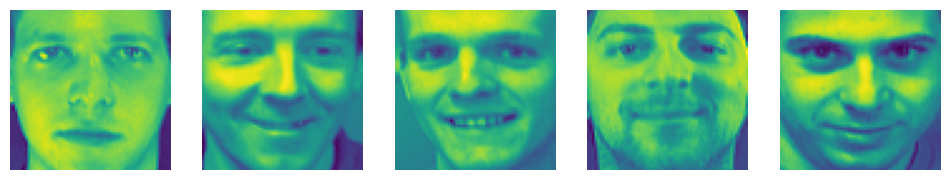

In [11]:
fig, ax = plt.subplots(1,5, figsize=(12,20))
for i in range(5):
    ax[i].imshow(data[i*20].reshape(64,64))
    ax[i].axis('off')
plt.show()

In [13]:
train = data[targets < 30]
test = data[targets >= 30]

In [14]:
n_faces = 5
rng = check_random_state(2024)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

In [25]:
n_pixels = data.shape[1]
X_train = train[:,: (n_pixels +1)//2]
y_train = train[:,n_pixels // 2:]
X_test = test[:,: (n_pixels +1)//2]
y_test = test[:,n_pixels // 2:]

In [26]:
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(min_samples_split=5),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(min_samples_split=5)
}

In [29]:
y_hat_predict = dict()
for name, model in models.items():
    model.fit(X_train, y_train)
    y_hat_predict[name] = model.predict(X_test)

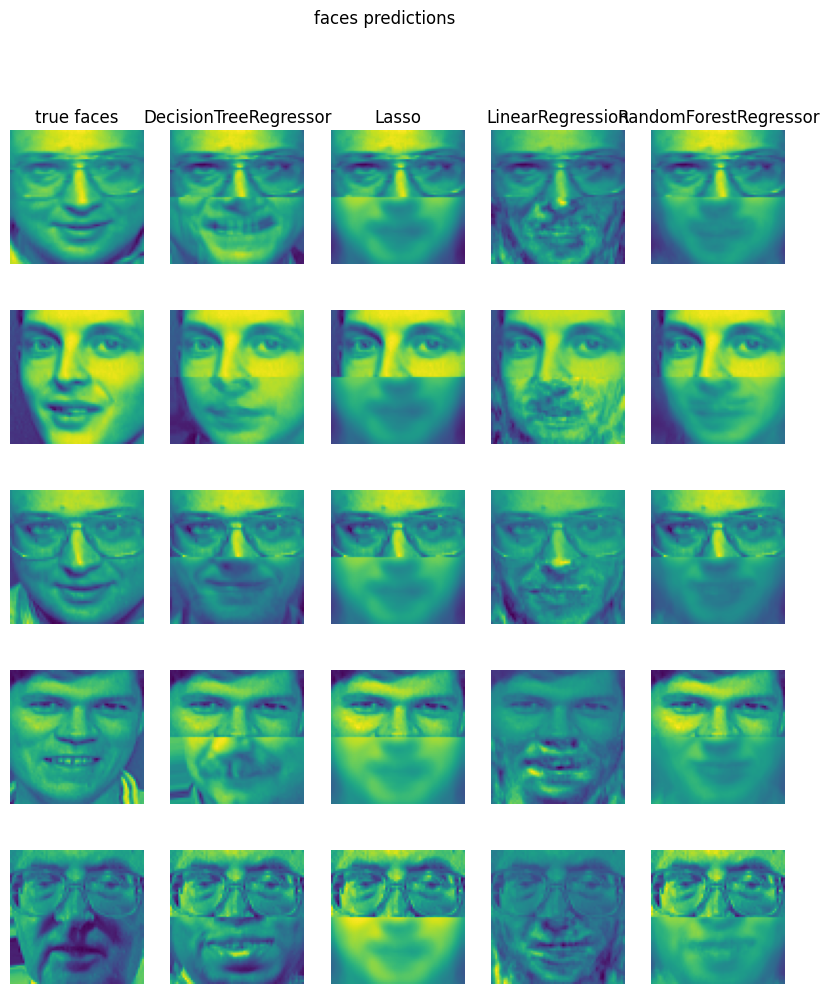

In [31]:
image_shape = (64,64)
n_cols = 1 + len(models)
plt.figure(figsize=(2.0*n_cols, 2.26*n_faces))
plt.suptitle('faces predictions')
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))
    if i:
        sub = plt.subplot(n_faces, n_cols, i*n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i*n_cols + 1, title='true faces')
    sub.axis('off')
    sub.imshow(true_face.reshape(image_shape))
    for j,est in enumerate(sorted(models)):
        completed_face = np.hstack((X_test[i], y_hat_predict[est][i]))
        if i:
            sub = plt.subplot(n_faces, n_cols, i*n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i*n_cols + 2 + j, title=est)
        sub.axis('off')
        sub.imshow(completed_face.reshape(image_shape))